# Predict average rating for board games

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
games = pd.read_csv('game_data.csv')

In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113.0,8.33774,8.22186,26647.0,372.0,1219.0,5865.0,5347.0,2562.0,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383.0,8.28798,8.14232,16519.0,132.0,1586.0,6277.0,2526.0,1423.0,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262.0,8.28994,8.06886,12230.0,99.0,1476.0,5600.0,1700.0,777.0,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294.0,8.20407,8.05804,14343.0,362.0,1084.0,5075.0,3378.0,1642.0,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883.0,8.14261,8.04524,44362.0,795.0,861.0,5414.0,9173.0,5213.0,3.2943


(array([  2.00000000e+00,   4.00000000e+00,   1.30000000e+01,
          6.10000000e+01,   3.77000000e+02,   1.60500000e+03,
          4.22500000e+03,   4.93500000e+03,   1.76100000e+03,
          1.11000000e+02]),
 array([ 0.    ,  0.9145,  1.829 ,  2.7435,  3.658 ,  4.5725,  5.487 ,
         6.4015,  7.316 ,  8.2305,  9.145 ]),
 <a list of 10 Patch objects>)

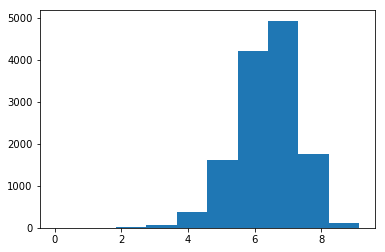

In [4]:
plt.hist(games["average_rating"].dropna())

In [5]:
print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [6]:
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]

# Remove any rows with missing values.
games = games.dropna(axis=0)

# plot k means cluster by using PCA to reduce dimensionality
    > One set could be a set of highly rated games. One way to figure out more about these sets of games is a technique called clustering. Clustering enables you to find patterns within your data easily by grouping similar rows (in this case, games), together.
    
    
    > dimensionality reduction before feeding into algorithm
    > PCA takes multiple columns, and turns them into fewer columns while trying to preserve the unique information in each column

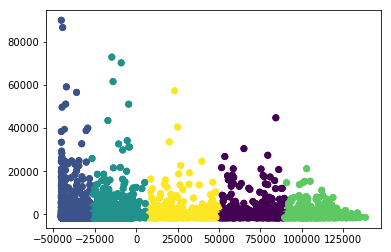

In [7]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)

# Create a PCA model.
pca_2 = PCA(2)

# Get only the numeric columns from games.
good_columns = games._get_numeric_data()

# Fit the model using the good columns.
kmeans_model.fit(good_columns)

# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)

# Get the cluster assignments.
labels = kmeans_model.labels_

# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

### what are we trying to predict?  
    > as a first step... what columns are best correlated
    > remove the ones we dont want

In [8]:
games.corr()["average_rating"]

id                      0.309743
yearpublished           0.082063
minplayers             -0.078165
maxplayers             -0.026011
playingtime             0.057288
minplaytime             0.046333
maxplaytime             0.057288
minage                  0.192092
users_rated             0.252832
average_rating          1.000000
bayes_average_rating    0.575895
total_owners            0.264096
total_traders           0.194392
total_wanters           0.435278
total_wishers           0.396079
total_comments          0.264742
total_weights           0.248503
average_weight          0.534141
Name: average_rating, dtype: float64

In [9]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name"]]

# Store the variable we'll be predicting on.
target = "average_rating"

# separate into training & test sets

In [10]:
# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]

In [11]:
print('train {}\ntest{}'.format(train.shape, test.shape))

train (10473, 20)
test(2618, 20)


# IMPORTANT

In [12]:
print("columns used in regression model {}\ncolumns used in training set data frame {}".format(len(columns), len(train.columns.tolist())))

columns used in regression model 16
columns used in training set data frame 20


# these columns were removed before so they're not being used when fitting the model

    > SHOULD HAVE CREATED A NEW DATA FRAME WITH ONLY COLUMNS BEING USED?

In [13]:
[i for i in train.columns.tolist() if i not in columns]

['type', 'name', 'average_rating', 'bayes_average_rating']

# !!!predict!!!

    > init linear regression
    > !!!!!!columns variable DOES NOT have average rating in it!!!!!!!! 

In [14]:
# Initialize the model class.
model = LinearRegression()

# Fit the model to the training data  -- give the questions & answers to help model learn 
model.fit(train[columns], train[target])

# use the regresison model stored in model variable to predict average rating...
# using data that was never seen before (i.e. data in test set) -- COLUMNS LIST DOES NOT CONTAIN AVERAGE_RATING
predictions = model.predict(test[columns])
predictions

array([ 9.2911193 ,  9.17860464,  8.36401369, ...,  6.67387217,
        5.97084751,  4.83250944])

    
# model was off by an average of .43 on the average rating score?

    > compare predictions made from model to actual target column (average rating) in test data 

In [15]:
# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

0.43266284345633577

# try random forest 

In [16]:
# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

In [17]:
# Fit the model to the data.
model.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [18]:
# Make predictions.
predictions = model.predict(test[columns])

In [19]:
# Compute the error.
mean_squared_error(predictions, test[target])

0.25080170029989385